# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("C://Users//ideapad//Desktop//projects-new//British ariways//customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [47]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [48]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
# Printing the Total Numbers of Rows and Columns

df.shape

(50000, 14)

In [9]:
# Printing Columns Nams

df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
# Printing Null Values

df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
# Printing the Duplicated Values

df.duplicated().sum()

719

In [12]:
# Droping Duplicated Values

df.drop_duplicates(inplace=True)

In [13]:
# Printing the Duplicated Values After Removing Duplicated Values

df.duplicated().sum()

0

In [14]:
# Printing the Total Numbers of Rows and Columns After Removing Duplicated Values

df.shape

(49281, 14)

In [15]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [16]:
#printing usinque values in each column
print("Printing unique values of each column")
for i in df.columns[:]:
  print("*"*70)
  print("number of unique values of ",i," column :",df[i].nunique())
  print("unique values:")
  print(df[i].unique())

Printing unique values of each column
**********************************************************************
number of unique values of  num_passengers  column : 9
unique values:
[2 1 3 4 6 5 7 9 8]
**********************************************************************
number of unique values of  sales_channel  column : 2
unique values:
['Internet' 'Mobile']
**********************************************************************
number of unique values of  trip_type  column : 3
unique values:
['RoundTrip' 'CircleTrip' 'OneWay']
**********************************************************************
number of unique values of  purchase_lead  column : 470
unique values:
[262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85 

In [17]:
df.num_passengers.value_counts()

1    30879
2    12669
3     2882
4     1767
5      544
6      281
7      107
8       88
9       64
Name: num_passengers, dtype: int64

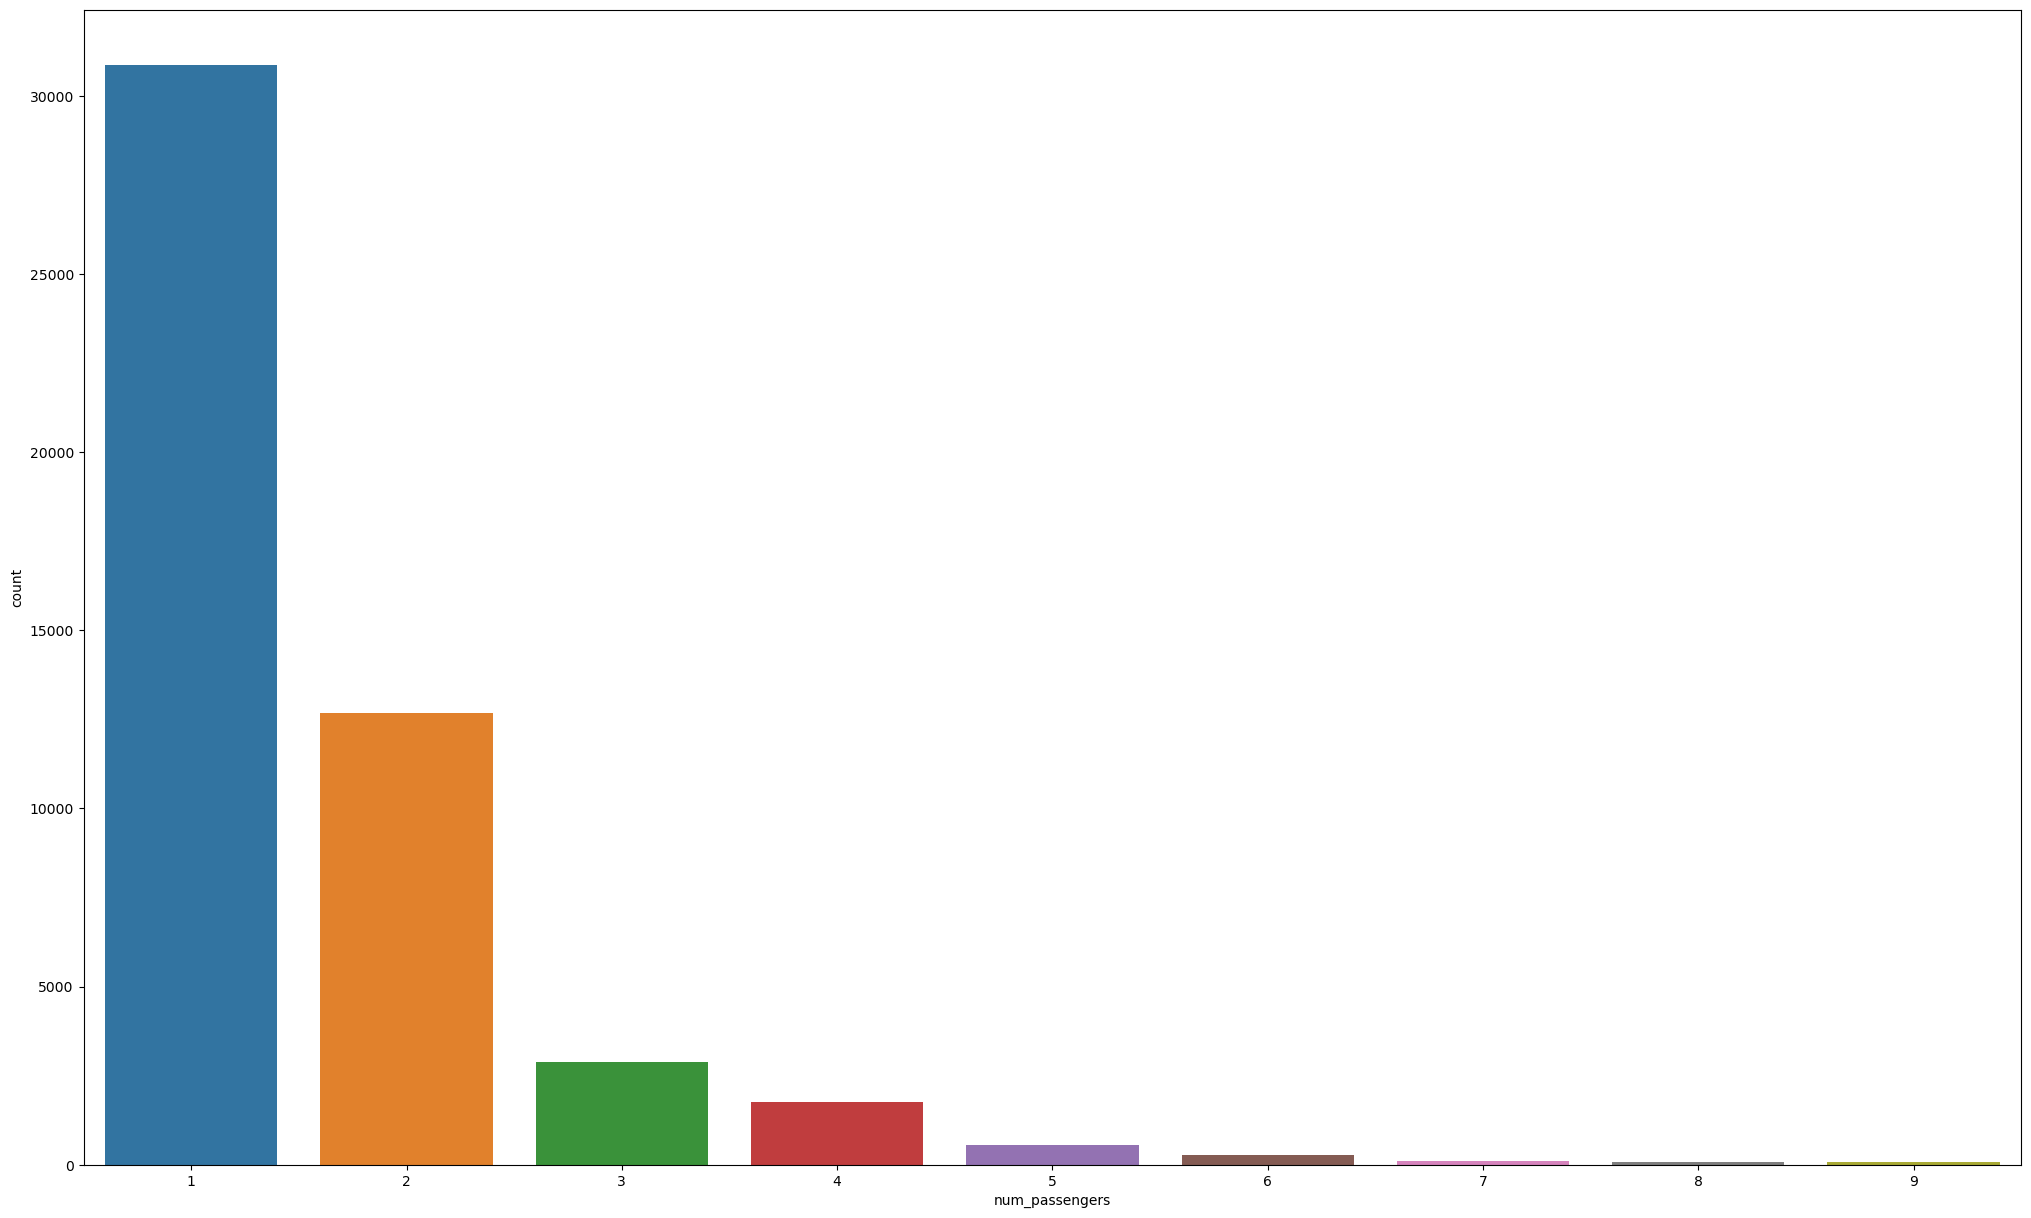

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
sns.countplot(x=df.num_passengers)

plt.show()

In [20]:
df.sales_channel.value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

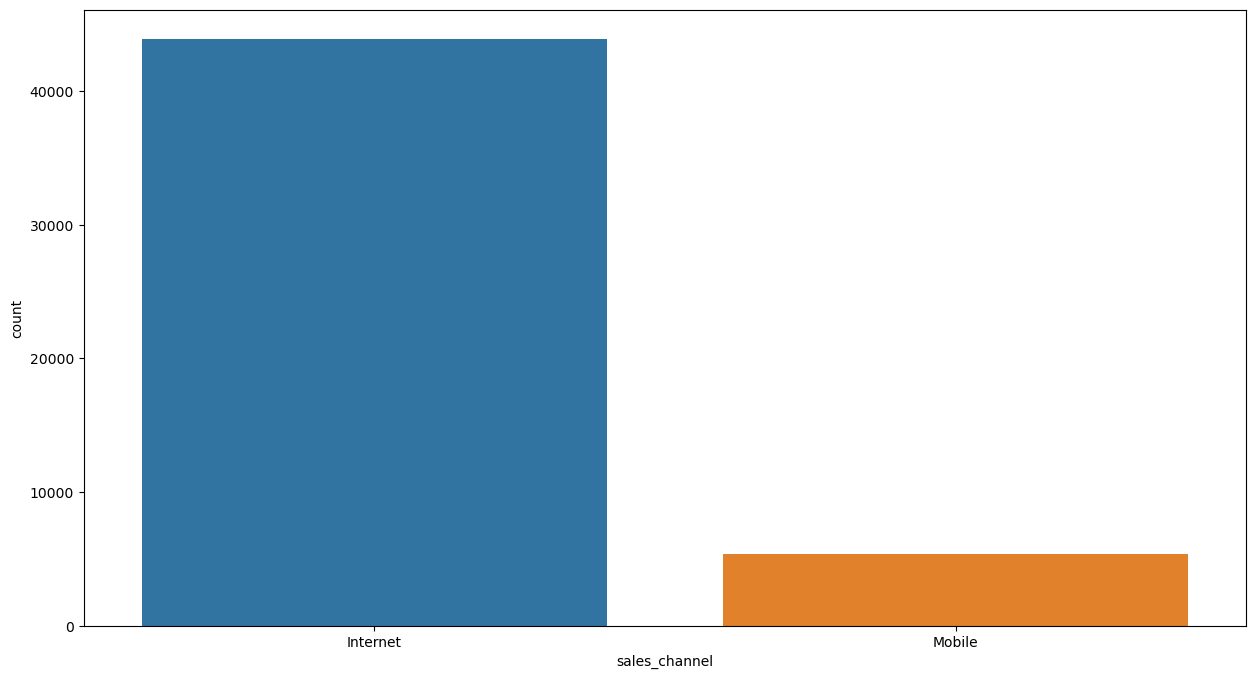

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x=df.sales_channel)
plt.show()


In [22]:
df.trip_type.value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

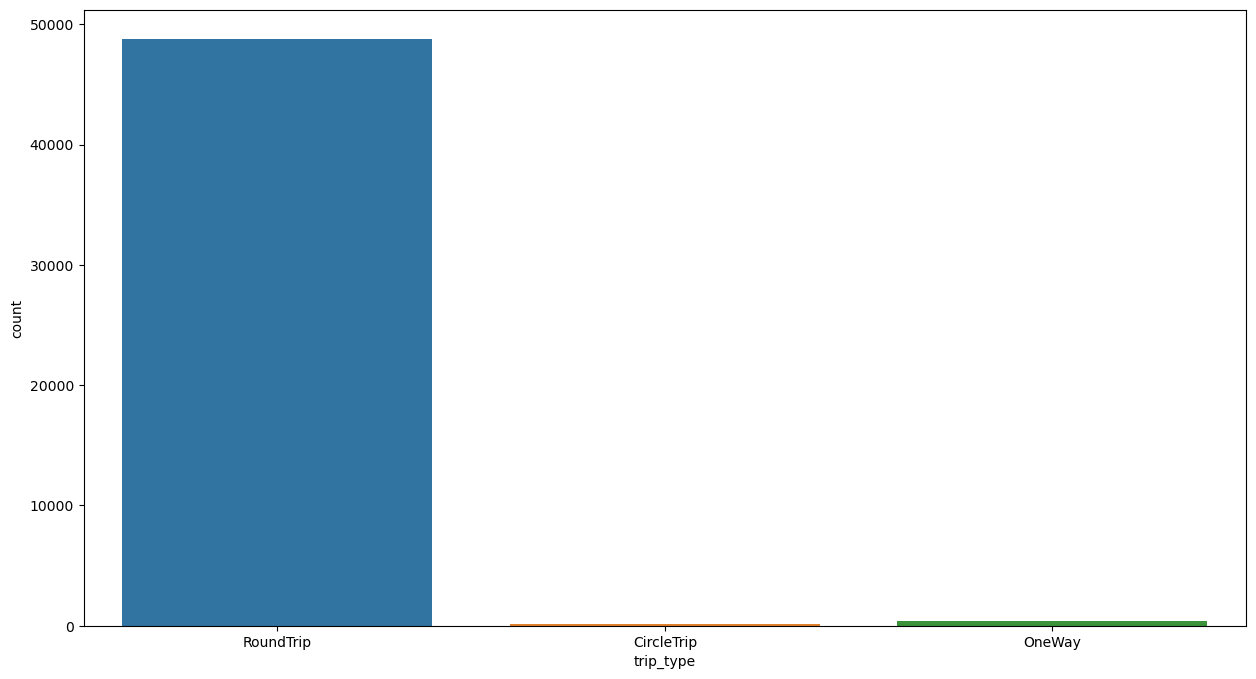

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.trip_type)
plt.show()

In [24]:
df.length_of_stay.value_counts()


6      7611
5      7151
4      5568
3      2798
17     1823
       ... 
242       1
392       1
431       1
513       1
329       1
Name: length_of_stay, Length: 335, dtype: int64

In [40]:
import scipy.stats as stats

def visua(n, text):
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.distplot(x=n)
    plt.title(text)

    plt.show()

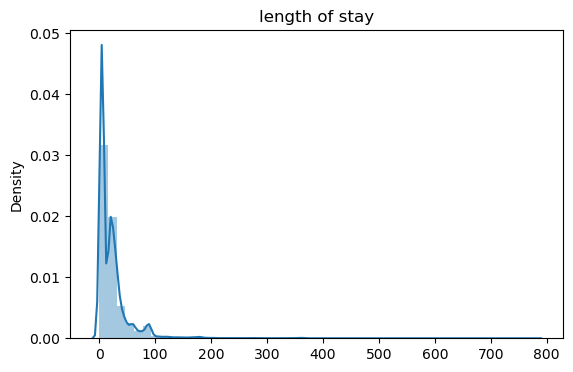

In [41]:
visua(df.length_of_stay,"length of stay")

In [31]:
import warnings
warnings.filterwarnings("ignore") 

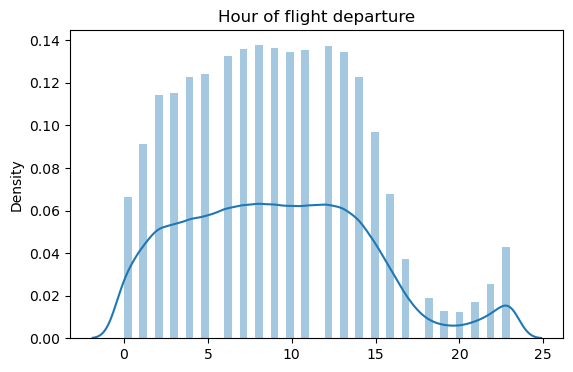

In [45]:
visua(df.flight_hour,"Hour of flight departure")

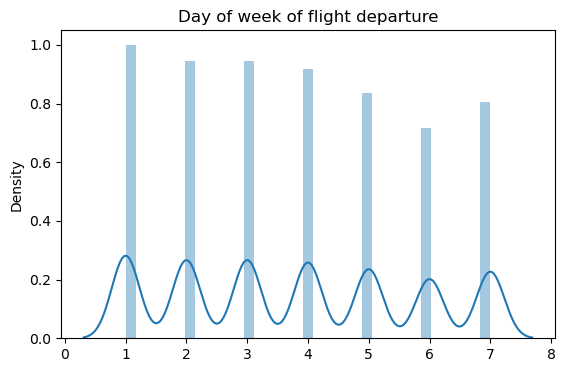

In [49]:
visua(df.flight_day,"Day of week of flight departure")

In [50]:
df.route.value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [51]:
df.booking_origin.value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [52]:
df.wants_extra_baggage.value_counts()

1    32931
0    16350
Name: wants_extra_baggage, dtype: int64

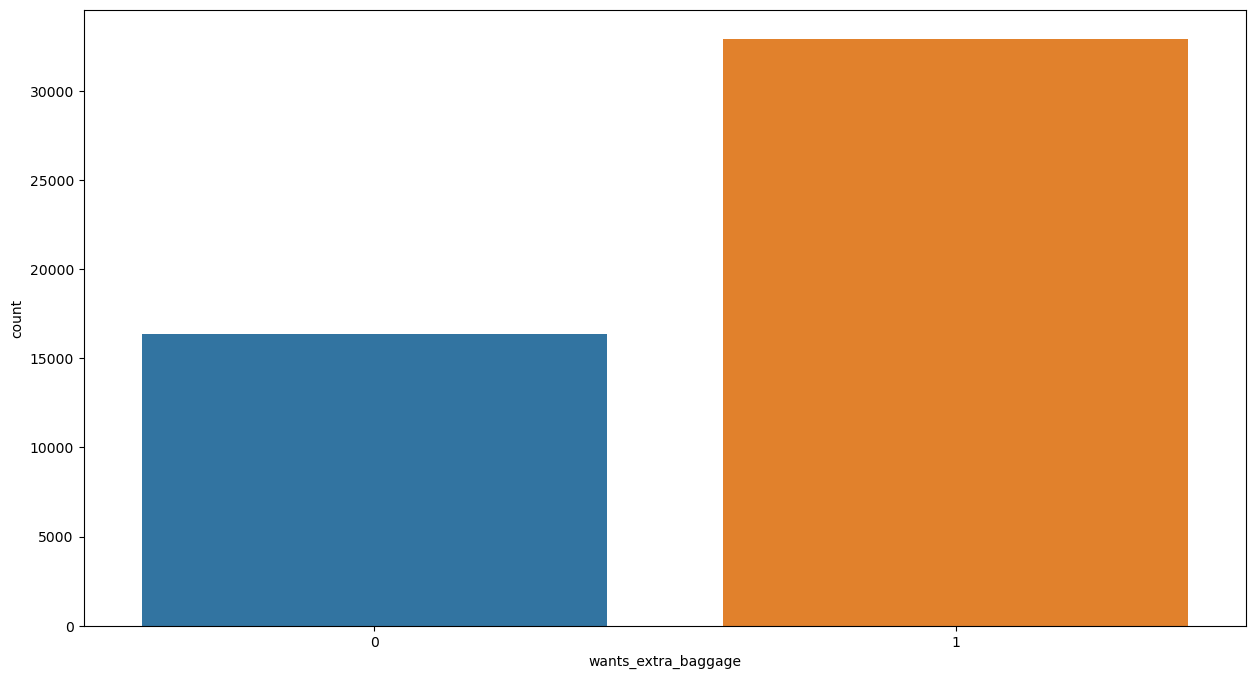

In [53]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.wants_extra_baggage)
plt.show()

In [59]:
df.wants_preferred_seat.value_counts()

0    34712
1    14569
Name: wants_preferred_seat, dtype: int64

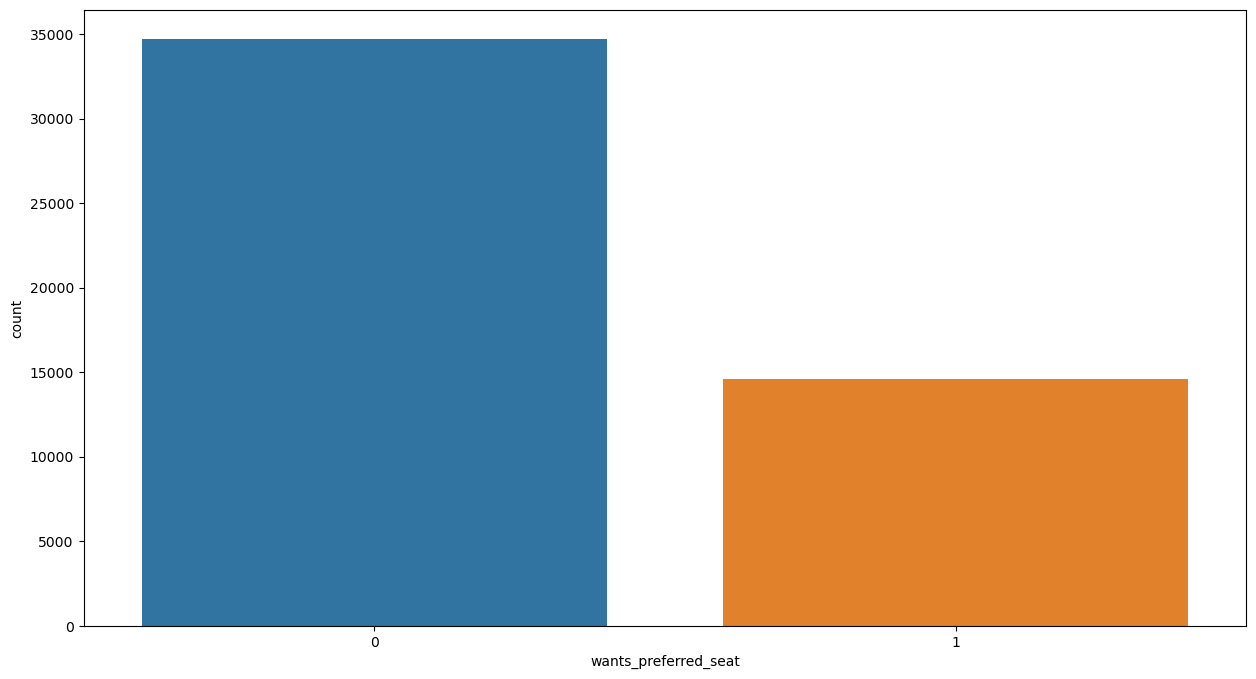

In [60]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.wants_preferred_seat)
plt.show()

In [61]:
df.wants_in_flight_meals.value_counts()

0    28256
1    21025
Name: wants_in_flight_meals, dtype: int64

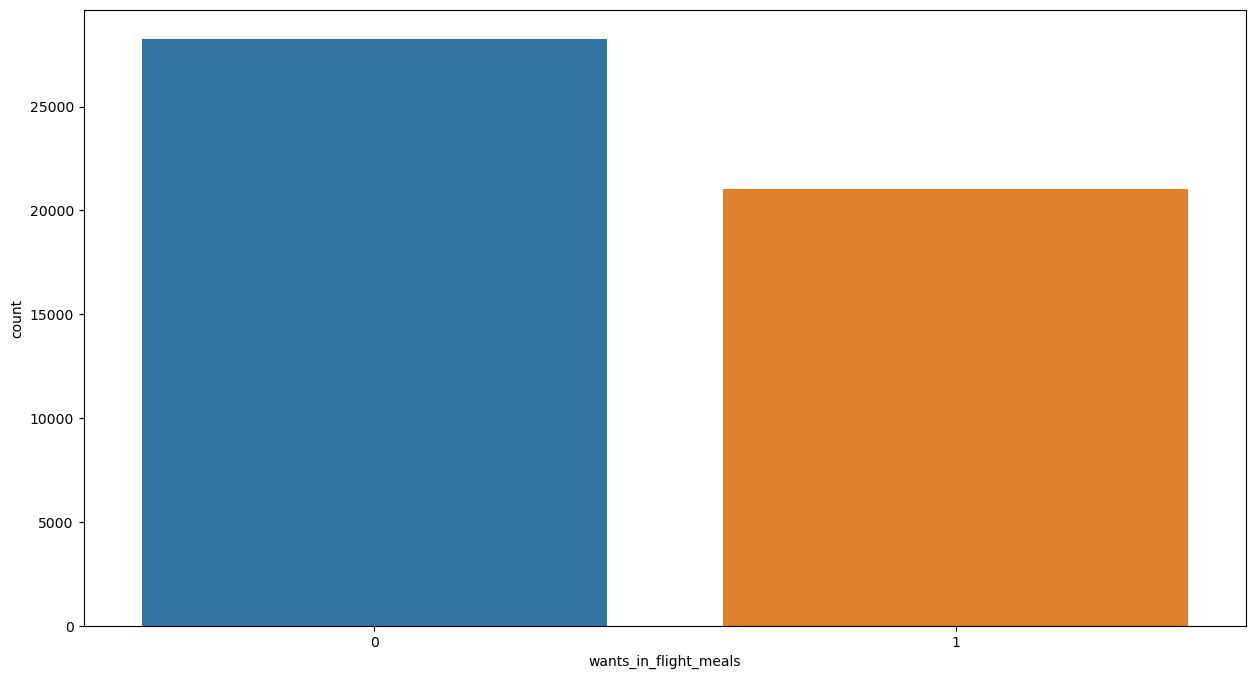

In [62]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.wants_in_flight_meals)
plt.show()

In [63]:
df.flight_duration.value_counts()

8.83    14339
8.58     6892
5.62     5464
6.62     4658
7.00     3314
7.57     2785
4.67     2699
6.42     1708
5.33     1506
4.75     1246
6.33     1178
8.67      787
5.52      664
5.07      501
4.72      486
8.15      299
5.00      237
7.42      221
4.83      145
5.13      116
9.50       36
Name: flight_duration, dtype: int64

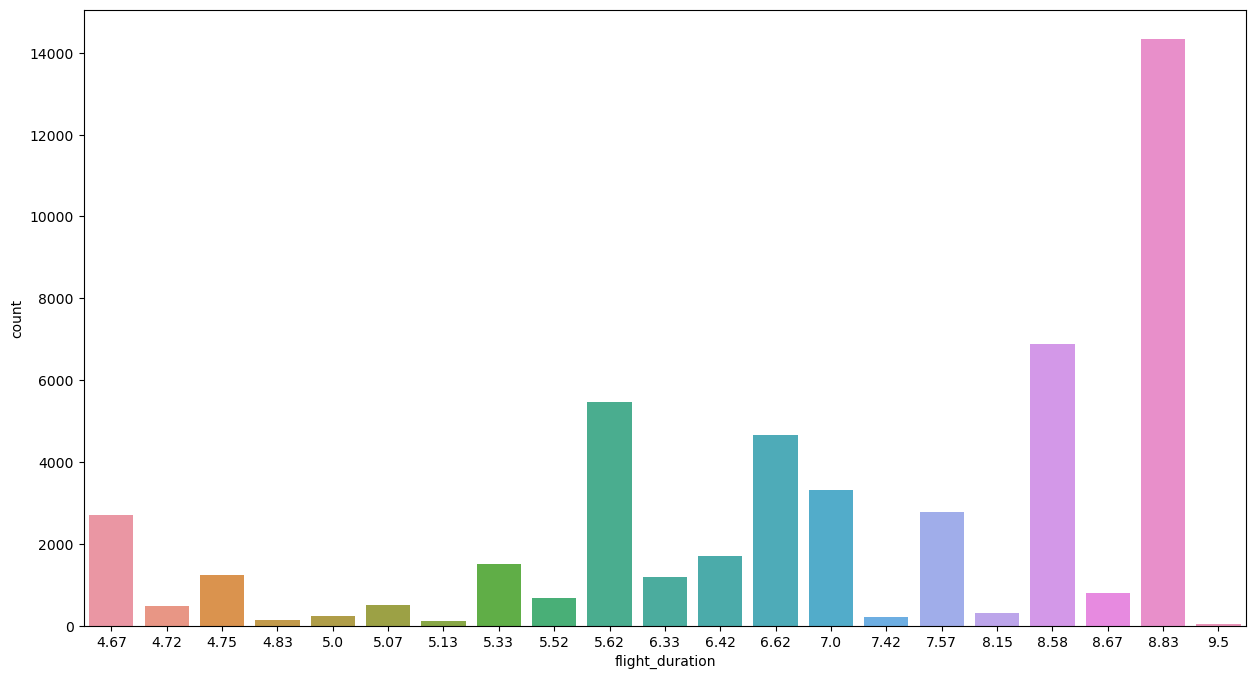

In [64]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.flight_duration)
plt.show()

In [65]:
df.booking_complete.value_counts()

0    41890
1     7391
Name: booking_complete, dtype: int64

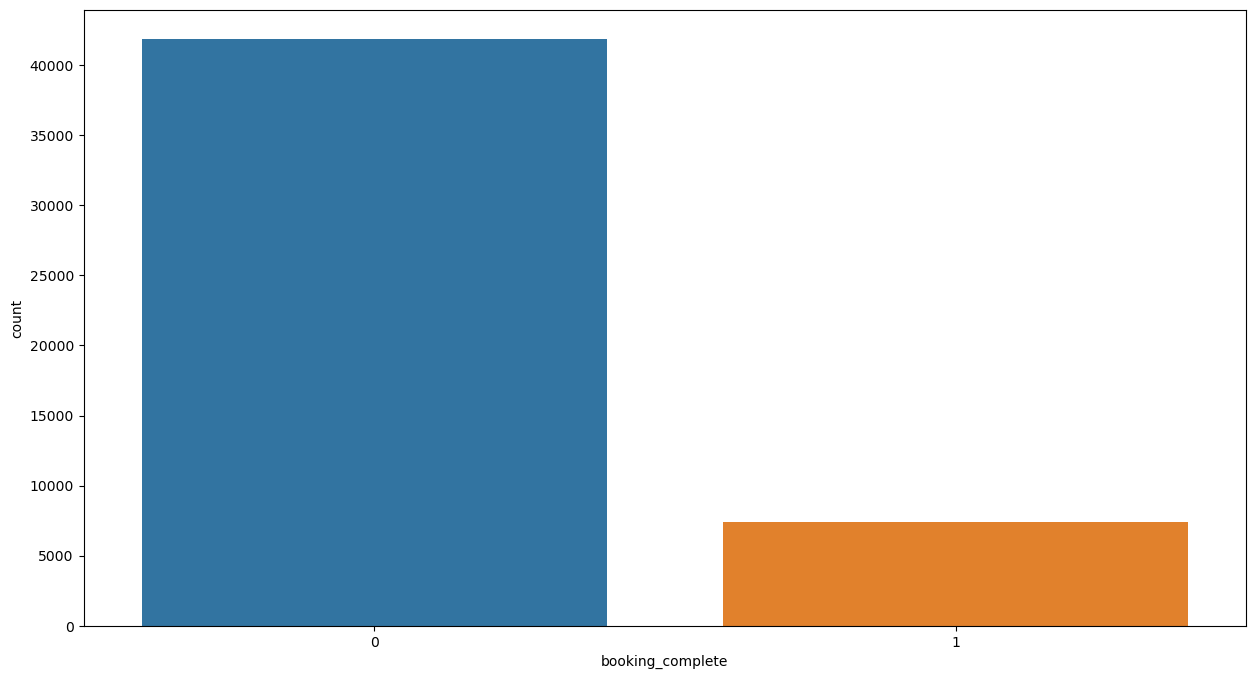

In [66]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.booking_complete)
plt.show()

In [67]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [69]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete  

In [71]:
#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your feature matrix and target variable respectively
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feature_importances = rf.feature_importances_
feature_names = X.columns

# Creating a pandas Series for easy sorting and visualization
importance_scores = pd.Series(feature_importances, index=feature_names)
importance_scores = importance_scores.sort_values(ascending=False)

importance_scores  # Display feature importance scores

purchase_lead            0.195011
route                    0.148222
flight_hour              0.141387
length_of_stay           0.126959
booking_origin           0.109119
flight_day               0.092030
flight_duration          0.071960
num_passengers           0.048144
wants_in_flight_meals    0.021890
wants_preferred_seat     0.016962
wants_extra_baggage      0.015049
sales_channel            0.011726
trip_type                0.001541
dtype: float64

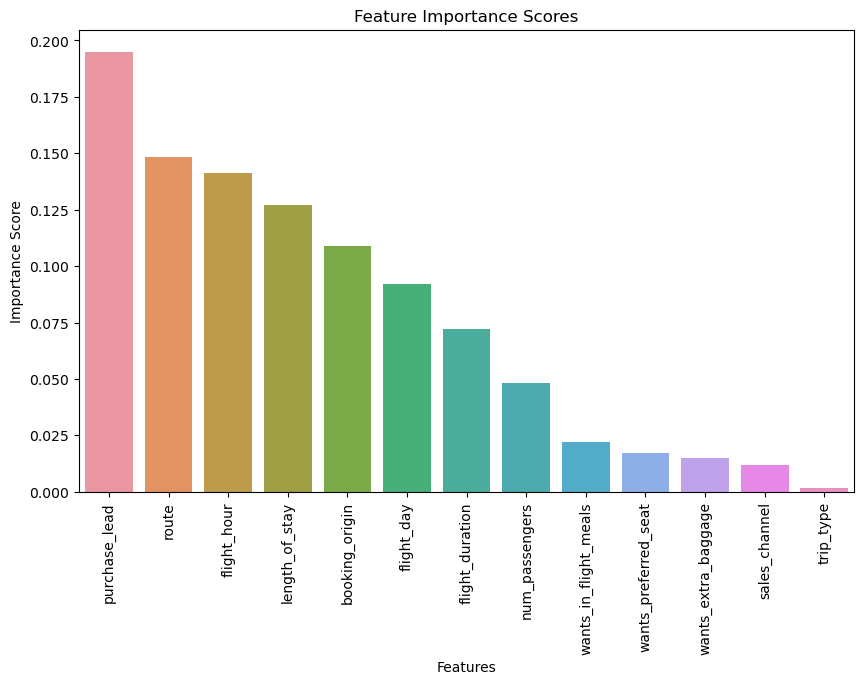

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_scores.index, y=importance_scores.values)
plt.title('Feature Importance Scores')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

In [76]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.052193
booking_origin           0.044861
flight_duration          0.019030
wants_extra_baggage      0.009160
length_of_stay           0.008130
wants_in_flight_meals    0.003420
trip_type                0.002526
sales_channel            0.001841
num_passengers           0.001731
flight_hour              0.001344
purchase_lead            0.001021
wants_preferred_seat     0.000747
flight_day               0.000418
Name: MI Scores, dtype: float64

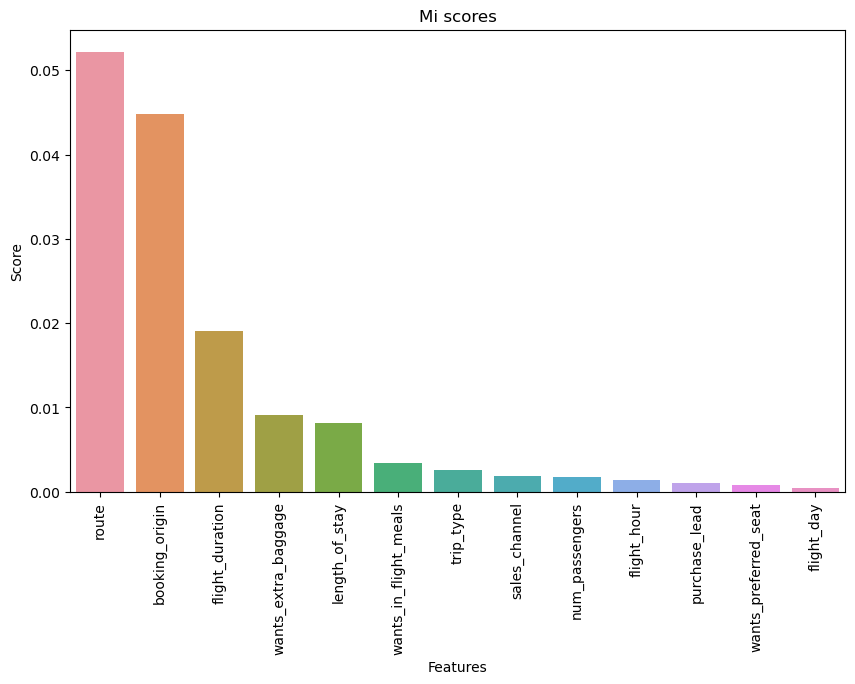

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.index, y=mi_scores.values)
plt.title('Mi scores')
plt.xlabel('Features')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#By combining the feature importance score of both metrics choosing following coloums for model building 
route,booking_origin, flight_duration,wants_extra_baggage,length_of_stay,purchase_lead,flight_hour

In [81]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [82]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [83]:
#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers','purchase_lead','flight_hour']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

**Model 1 : Random forest classifier with top 8 features**

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [90]:

#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers','purchase_lead','flight_hour']
X_red= df[features]
#one hot encoding
X = pd.get_dummies(X_red, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)


forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))


ACCURACY:  84.8229684488181
AUC score:  0.5310323230596


**Model 2 : Random forest classifier with all features**

In [91]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.8229684488181
AUC score:  0.5466087566018926


**Model 3 : XGB classifier with top 8 features**

In [93]:
from xgboost import XGBClassifier

X= df[features]
print(X.columns)

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

Index(['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage',
       'length_of_stay', 'num_passengers', 'purchase_lead', 'flight_hour'],
      dtype='object')
ACCURACY:  84.73166277772141
AUC score:  0.5177002103571877


**Model 4 : XGB classifier with all features**

In [99]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.85340367251699
AUC score:  0.5323239871720831
